In [1]:
import pandas as pd
import gdal
import numpy as np
import time, os, glob

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

West Africa Biomass Site

In [3]:
datadirectory = '/Volumes/Salo/Salo_ai/SAR_CH3/wa_v2/BIOsS1'
datefile = 'S32631X398020Y1315440sS1_A_vv_0001_mtfil.dates'
imagefile='S32631X398020Y1315440sS1_A_vv_0001_mtfil.vrt'
imagefile_cross='S32631X398020Y1315440sS1_A_vh_0001_mtfil.vrt'

In [4]:
os.chdir(datadirectory)

In [5]:
os.getcwd()

'/Volumes/Salo/Salo_ai/SAR_CH3/wa_v2/BIOsS1'

In [6]:
dates = open(datefile).readlines()
tindex = pd.DatetimeIndex(dates)

In [7]:
# From the index we make and print a lookup table for
# band numbers and dates
j=1 
print('Bands and dates for', imagefile)
for i in tindex:
    print("{:4d} {}".format(j, i.date()), end ='')
    j+=1
    if j%5==1:print()

Bands and dates for S32631X398020Y1315440sS1_A_vv_0001_mtfil.vrt
   1 2015-03-22   2 2015-04-03   3 2015-04-15   4 2015-05-09   5 2015-05-21
   6 2015-06-02   7 2015-06-14   8 2015-06-26   9 2015-07-08  10 2015-07-20
  11 2015-08-01  12 2015-08-13  13 2015-08-25  14 2015-09-06  15 2015-09-18
  16 2015-09-30  17 2015-10-12  18 2015-10-24  19 2015-11-17  20 2015-11-29
  21 2015-12-11  22 2015-12-23  23 2016-01-04  24 2016-01-28  25 2016-02-09
  26 2016-03-04  27 2016-03-16  28 2016-03-28  29 2016-04-09  30 2016-04-21
  31 2016-05-03  32 2016-05-15  33 2016-05-27  34 2016-06-08  35 2016-07-02
  36 2016-07-14  37 2016-07-26  38 2016-08-07  39 2016-08-19  40 2016-08-31
  41 2016-09-12  42 2016-09-24  43 2016-10-06  44 2016-10-18  45 2016-10-30
  46 2016-11-11  47 2016-11-23  48 2016-12-05  49 2016-12-17  50 2016-12-29
  51 2017-01-10  52 2017-01-22  53 2017-02-03  54 2017-02-15  55 2017-02-27
  56 2017-03-11  57 2017-03-23  58 2017-04-04  59 2017-04-16  60 2017-04-28
  61 2017-05-10  62 201

In [8]:
img = gdal.Open(imagefile)

In [9]:
print(img.RasterCount) # Number of Bands
print(img.RasterXSize) # Number of Pixels
print(img.RasterYSize) # Number of Lines

77
4243
3776


In [10]:
band = img.GetRasterBand(1)

In [11]:
raster = band.ReadAsArray()

In [12]:
raster_sub = band.ReadAsArray(5,20,5,5)

In [13]:
raster_sub

array([[4308, 4616, 4944, 4850, 4130],
       [3639, 4142, 4789, 5224, 4745],
       [3361, 3980, 4785, 5364, 4999],
       [3383, 3946, 4674, 5118, 4936],
       [3359, 3687, 4155, 4711, 5004]], dtype=uint16)

In [14]:
# These will select the two bands
raster_1 = img.GetRasterBand(5).ReadAsArray()
raster_2 = img.GetRasterBand(18).ReadAsArray()

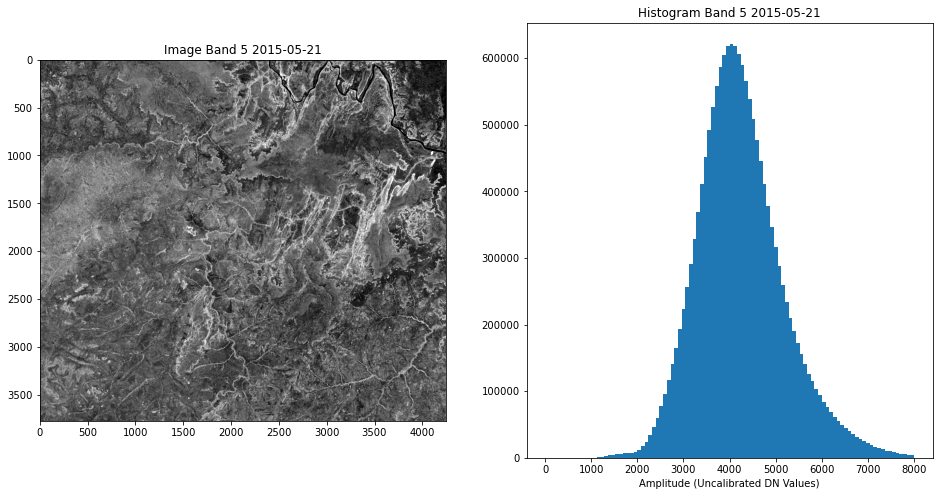

In [15]:
fig = plt.figure(figsize=(16,8)) # Initialize figure with a size
ax1 = fig.add_subplot(121) # 121 determines: 1 row, 2 plots, first plot
ax2 = fig.add_subplot(122) # 122 determines: 1 row, 2 plots, second plot

# First plot: Image
bandnbr=5
ax1.imshow(raster_1,cmap = 'gray', vmin = 2000, vmax = 8000)
ax1.set_title('Image Band {} {}'.format(bandnbr,
                                       tindex[bandnbr-1].date()))

# Second Plot: Histogram
# IMPORTANT: To get a histogram, we firest need to *flatten*
# the two-dimensioanl image into a one dimenstional vector.
h = ax2.hist(raster_1.flatten(), bins=100, range=(0,8000))
ax2.xaxis.set_label_text("Amplitude (Uncalibrated DN Values)")
_ = ax2.set_title('Histogram Band {} {}'.format(bandnbr,
                                               tindex[bandnbr-1].date()))

In [16]:
def showImage(raster, tindex, bandnbr, vmin = None, vmax = None):
    fig = plt.figure(figsize = (16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.imshow(raster, cmap = 'gray', vmin = vmin, vmax = vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,
                                           tindex[bandnbr-1].date()))
    vmin = np.percentile(raster,2) if vmin == None else vmin # Change vmin and vmax to change what value are displayed
    vmax = np.percentile(raster, 98) if vmax == None else vmax 
    ax1.xaxis.set_label_text(
    'Linear stretch Min = {} Max = {}'.format(vmin, vmax))
    
    
    h = ax2.hist(raster.flatten(), bins = 100, range = (0, 8000))
    ax2.xaxis.set_label_text('Amplitude (Uncalibrated DN Values)')
    ax2.set_title('Histogram Band {} {}'.format(bandnbr,
                                               tindex[bandnbr-1].date()))

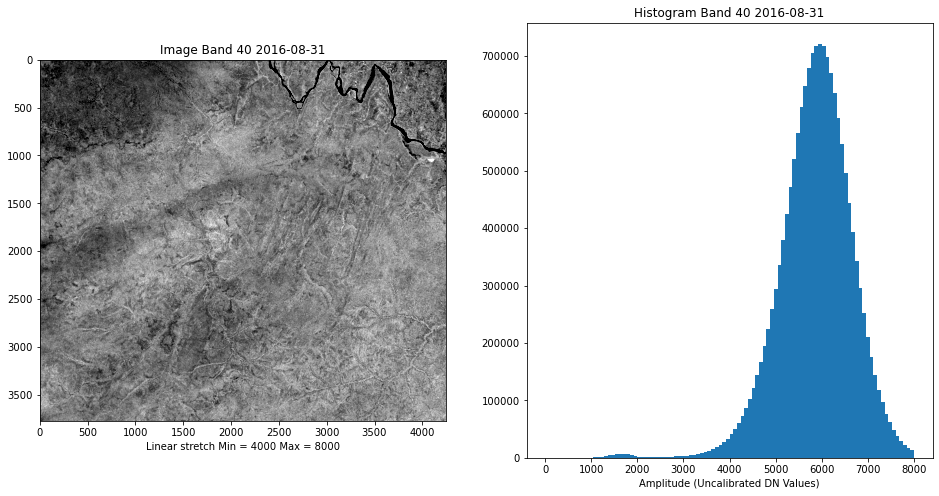

In [17]:
# Enter Your Code Here

bandnbr = 40
raster = img.GetRasterBand(bandnbr).ReadAsArray()
showImage(raster,tindex, bandnbr, 4000, 8000)

In [18]:
# These will select the first two bands
raster_3 = img.GetRasterBand(1).ReadAsArray()
raster_4 = img.GetRasterBand(2).ReadAsArray()

Text(0.5, 1.0, 'Image Band 2 2015-04-03')

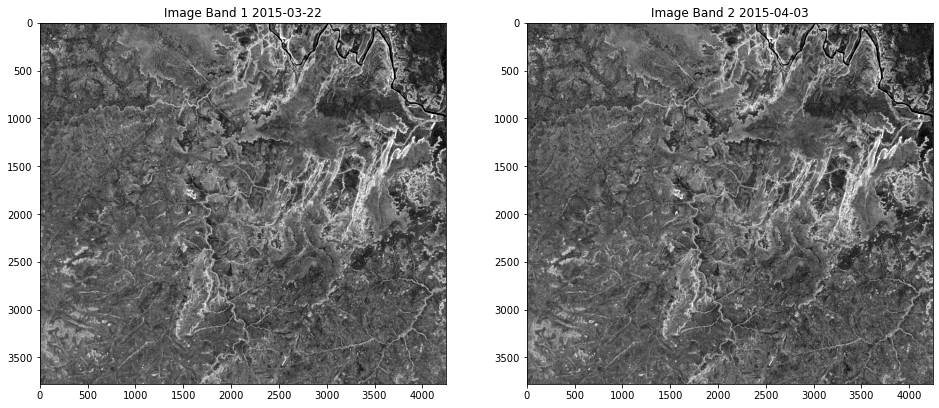

In [19]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

bandnbr = 1
ax1.imshow(raster_3, cmap = 'gray', vmin = 2000, vmax = 8000)
ax1.set_title('Image Band {} {}'.format(bandnbr,
                                       tindex[bandnbr-1].date()))
bandnbr = 2
ax2.imshow(raster_4, cmap = 'gray', vmin = 2000, vmax = 8000)
ax2.set_title('Image Band {} {}'.format(bandnbr,
                                       tindex[bandnbr-1].date()))

In [20]:
img.GetRasterBand(1).DataType

2

In [21]:
(img.RasterCount*img.RasterXSize*img.RasterYSize*2)/(1024^3)

2402455.182083739

In [22]:
#  ALternatively you canmake a subset and use it in the ReadAsArray function prefixed with a star
subset = (2000, 2000, 1024, 1024)
rasterDN = img.ReadAsArray(*subset)

In [23]:
rasterDN.shape

(77, 1024, 1024)

In [24]:
rasterdB = 20*np.log10(rasterDN)-83

In [25]:
rasterPwr = np.power(10.,rasterdB/10.)

In [26]:
rasterAmp = np.sqrt(rasterPwr)

In [27]:
bandnbr = 20
tindex[bandnbr-1]

Timestamp('2015-11-29 00:00:00')

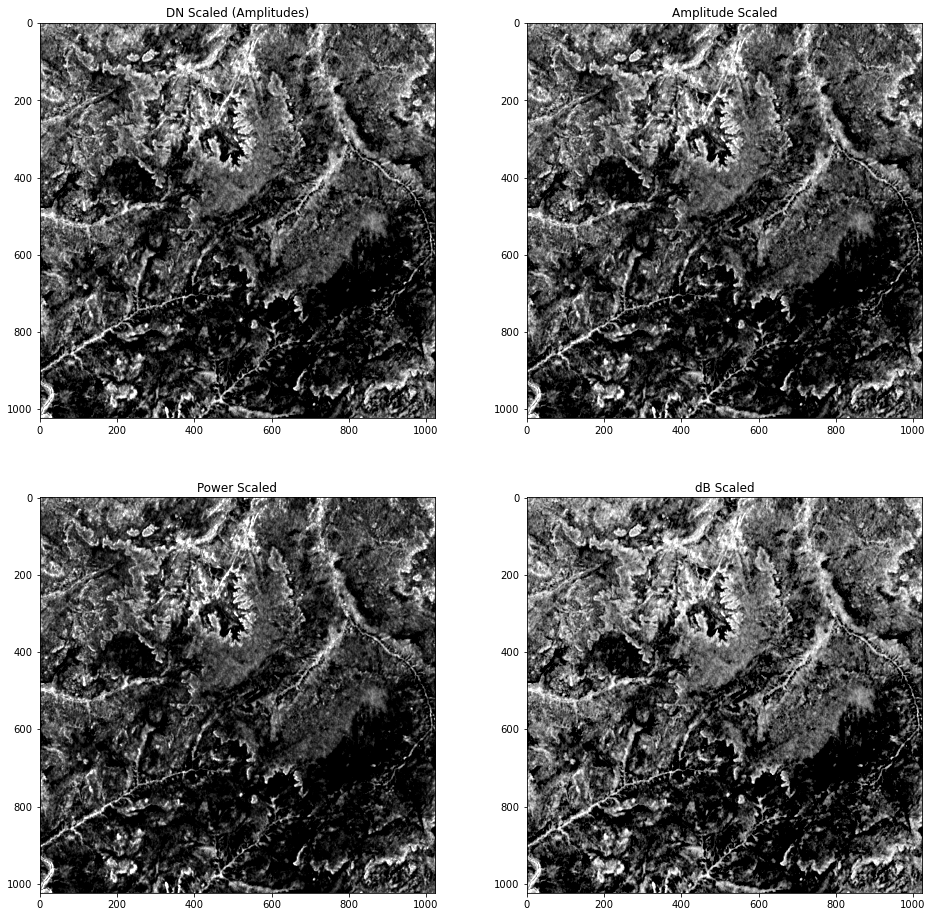

In [28]:
fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(rasterDN[bandnbr],cmap = 'gray',
           vmin = np.percentile(rasterDN, 10),
           vmax = np.percentile(rasterDN, 90))
ax2.imshow(rasterAmp[bandnbr], cmap = 'gray',
           vmin = np.percentile(rasterAmp, 10),
           vmax = np.percentile(rasterAmp, 90))
ax3.imshow(rasterPwr[bandnbr], cmap = 'gray',
           vmin = np.percentile(rasterPwr, 10),
           vmax = np.percentile(rasterPwr, 90))
ax4.imshow(rasterdB[bandnbr], cmap = 'gray',
          vmin = np.percentile(rasterdB, 10),
          vmax = np.percentile(rasterdB, 90))

ax1.set_title('DN Scaled (Amplitudes)')
ax2.set_title('Amplitude Scaled')
ax3.set_title('Power Scaled')
_ = ax4.set_title('dB Scaled')

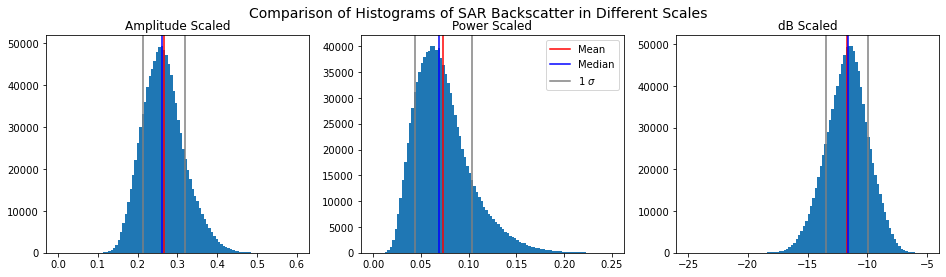

In [29]:
# Setup for three part figure
fig=plt.figure(figsize=(16,4))
fig.suptitle('Comparison of Histograms of SAR Backscatter in Different Scales',fontsize=14)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

# Important to "flatten" the 2D raster image to produce a historgram
ax1.hist(rasterAmp[bandnbr].flatten(),bins=100,range=(0.,0.6))
ax2.hist(rasterPwr[bandnbr].flatten(),bins=100,range=(0.,0.25))
ax3.hist(rasterdB[bandnbr].flatten(),bins=100,range=(-25,-5))

# Means, medians and stddev
amp_mean=rasterAmp[bandnbr].mean()
amp_std=rasterAmp[bandnbr].std()
pwr_mean=rasterPwr[bandnbr].mean()
pwr_std=rasterPwr[bandnbr].std()
dB_mean=rasterdB[bandnbr].mean()
dB_std=rasterdB[bandnbr].std()

# Some lines for mean and median
ax1.axvline(amp_mean,color='red')
ax1.axvline(np.median(rasterAmp[bandnbr]),color='blue')
ax2.axvline(pwr_mean,color='red',label='Mean')
ax2.axvline(np.median(rasterPwr[bandnbr]),color='blue',label='Median')
ax3.axvline(dB_mean,color='red')
ax3.axvline(np.median(rasterdB[bandnbr]),color='blue')

# Lines for 1 stddev
ax1.axvline(amp_mean-amp_std,color='gray')
ax1.axvline(amp_mean+amp_std,color='gray')
ax2.axvline(pwr_mean-pwr_std,color='gray',label='1 $\sigma$')
ax2.axvline(pwr_mean+pwr_std,color='gray')
ax3.axvline(dB_mean-dB_std,color='gray')
ax3.axvline(dB_mean+dB_std,color='gray')

ax1.set_title('Amplitude Scaled')
ax2.set_title('Power Scaled')
ax3.set_title('dB Scaled')
_=ax2.legend()

In [30]:
g1_dB = -10
g2_dB = -15
g1_pwr = np.power(10., -10/10.)
g2_pwr = np.power(10.,-15/10.)

mean_dB = (g1_dB + g2_dB)/2.
mean_pwr = (g1_pwr + g2_pwr)/2.
mean_pwr_indB = 10.*np.log10(mean_pwr)

print('Mean averaging dB values.         : {:.1f}'.format(mean_dB))
print('Mean averaging power values in dB : {:.1f}'.format(mean_pwr_indB))

Mean averaging dB values.         : -12.5
Mean averaging power values in dB : -11.8


In [31]:
offset = 500
size = 5
o1 = offset
o2 = offset + size

In [32]:
mean_dB = rasterdB[:,o1:o2,o1:o2].mean()
mean_dB

-11.302698

In [33]:
mean_pwr = rasterPwr[:,o1:o2,o1:o2].mean()
mean_pwr_in_dB = 10. * np.log10(mean_pwr)
mean_pwr_in_dB

-10.75519323348999

In [34]:
img_like = gdal.Open(imagefile)
img_cross = gdal.Open(imagefile_cross)
# Pick the bands read te raster and convert to dB
bandnbr_like = 20
bandnbr_cross = 20
r1 = img_like.GetRasterBand(bandnbr_like).ReadAsArray()
rc = img_cross.GetRasterBand(bandnbr_cross).ReadAsArray()
r1_dB = 20.*np.log10(r1)-83
rc_dB = 20.*np.log10(rc)-83

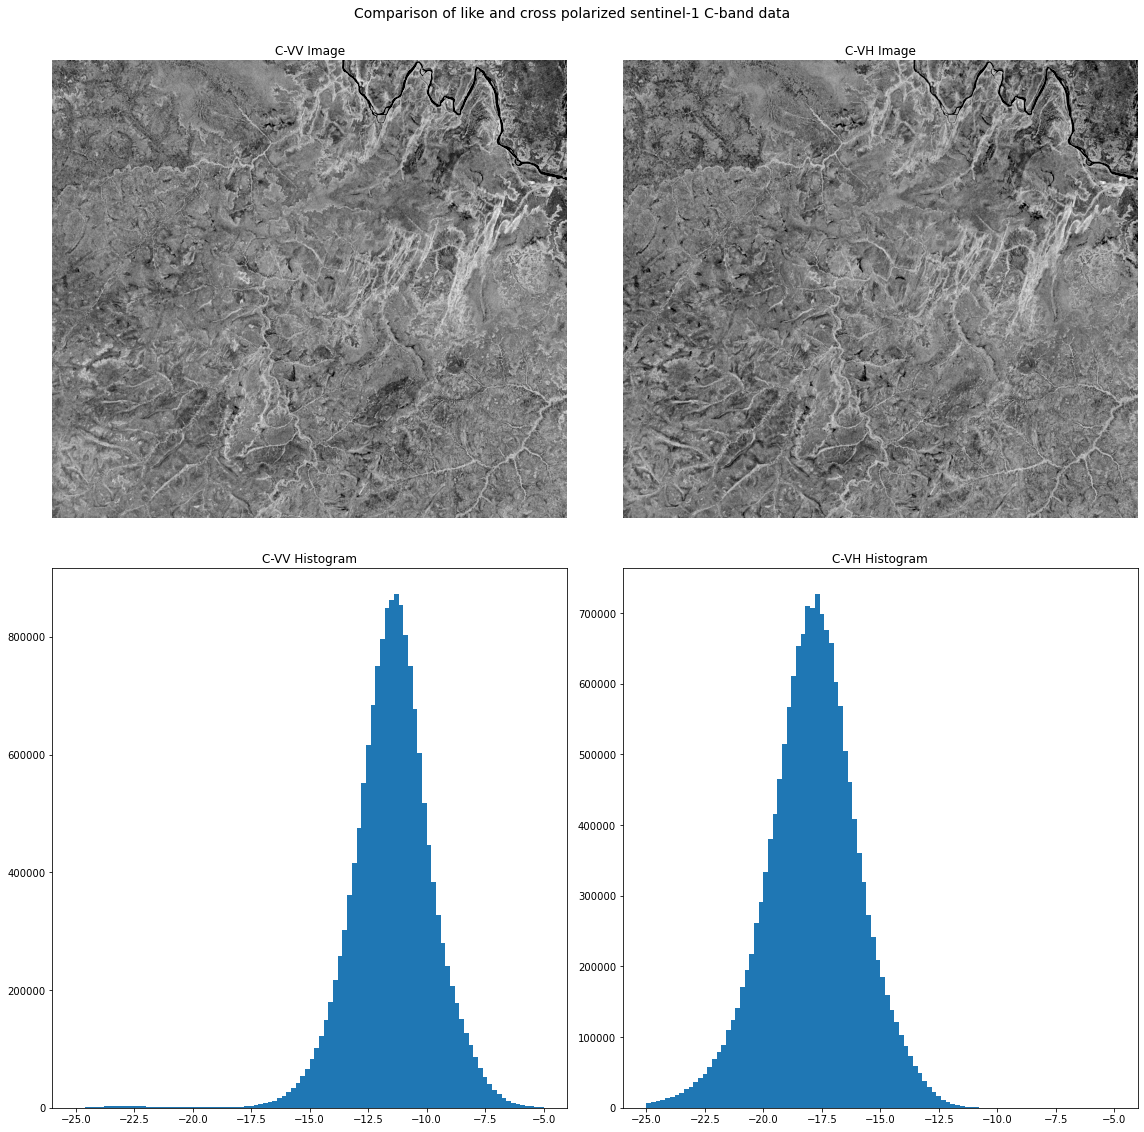

In [35]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,16))
fig.suptitle("Comparison of like and cross polarized sentinel-1 C-band data", fontsize = 14)

ax[0][0].set_title('C-VV Image')
ax[0][1].set_title('C-VH Image')
ax[1][0].set_title('C-VV Histogram')
ax[1][1].set_title('C-VH Histogram')
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[0][0].imshow(r1_dB, vmin = -17.5,vmax = -5, cmap = 'gray')
ax[0][1].imshow(rc_dB, vmin = -25, vmax = -10, cmap = 'gray')
ax[1][0].hist(r1_dB.flatten(), range = (-25, -5), bins = 100)
ax[1][1].hist(rc_dB.flatten(), range = (-25, -5), bins = 100)
fig.tight_layout()